# Municipal Crash Data Analysis
## here we will analize and explore the data from the municipal crash data agrigation 



to do notes:
fix year on acs query
change file location for Municipal CSV

In [2]:
#import necessary libraries 
#

import requests
import json, csv
import timeit
from pathlib import Path  

# import data handling libraries 
import numpy as np
import pandas as pd
import requests
import json
#from dateutil.rrule import rrule, DAILY, MONTHLY
#from datetime import  timedelta


#import graphing libraries 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors




from pathlib import Path  



pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.6f}'.format

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [3]:
#set global Variables

START_YEAR=2012

END_YEAR=2021




In [4]:


MUNI_CRASH_DF = pd.read_csv('/home/mitch/Documents/Climate Infographics/{}_TO_{}_MUNI_CRASH_DATA.csv'.format(START_YEAR,END_YEAR))
                           
MUNI_CRASH_DF.head()

,Unnamed: 0,NAME,PENN_DOT_MUNI_ID,state,county,county_subdivision,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,WALK_TO_WORK_MARG,DRIVE_SOLO_TO_WORK_EST,DRIVE_SOLO_TO_WORK_MARG,CARPOOL_TO_WORK_EST,CARPOOL_TO_WORK_MARG,PUBTRANS_TO_WORK_EST,PUBTRANS_TO_WORK_MARG,MUNI_NAME,COUNTY_NAME,PENN_DOT_COUNTY_NUM,PENN_DOT_COUNTY_NAME,PENN_DOT_MUNI_NAME,MUNICIPALITY_NAME,LAND_AREA.1,FEDERAL_EIN_CODE,HOME_RULE_CODE,HOME_RULE_NAME,HOME_RULE_YEAR,GOVERNMENTAL_FORM,EMPLOYEES_FULL_TIME,EMPLOYEES_PART_TIME,INCORPORATION_YEAR,MUNICIPALITY,AUTOMOBILE_COUNT,BICYCLE_BY_AUTO_COUNT,BICYCLE_DEATH_BY_AUTO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,PED_BY_AUTO_COUNT,PED_DEATH_BY_AUTO_COUNT,PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,BICYCLE_SOLO_COUNT,BICYCLE_DEATH_SOLO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT,PED_SOLO_COUNT,PED_DEATH_SOLO_COUNT,PED_SUSP_SERIOUS_INJ_SOLO_COUNT
0,0,"Philadelphia city, Philadelphia County","67,301.000000",42.000000,101.000000,"60,000.000000","1,596,865.000000",134.100000,"14,172.000000",940.000000,"54,269.000000","2,031.000000","343,702.000000","5,207.000000","55,482.000000","3,121.000000","152,058.000000","4,179.000000",PHILADELPHIA CITY,PHILADELPHIA COUNTY,67.000000,PHILADELPHIA COUNTY,PHILADELPHIA CITY,PHILADELPHIA CITY,134.100000,"236,003,047.000000",Home Rule,PHILADELPHIA CITY,"1,952.000000",NaN,"22,325.000000","1,037.000000",NaN,"67,301.000000","9,590.000000","2,091.000000",13.000000,67.000000,"7,563.000000",180.000000,427.000000,"1,551.000000",20.000000,57.000000,"6,279.000000",167.000000,390.000000
1,1,"Pittsburgh city, Allegheny County","2,301.000000",42.000000,3.000000,"61,000.000000","303,207.000000",55.400000,"1,920.000000",290.000000,"15,005.000000","1,033.000000","80,593.000000","2,054.000000","10,191.000000",814.000000,"23,357.000000","1,252.000000",PITTSBURGH CITY,ALLEGHENY COUNTY,2.000000,ALLEGHENY COUNTY,PITTSBURGH CITY,PITTSBURGH CITY,55.400000,"256,000,879.000000",Home Rule,CITY OF PITTSBURGH,"1,976.000000",NaN,"3,098.000000",149.000000,"1,816.000000","2,301.000000","1,588.000000",266.000000,3.000000,5.000000,"1,325.000000",14.000000,144.000000,172.000000,3.000000,13.000000,855.000000,33.000000,76.000000
2,2,"State College borough, Centre County","14,410.000000",42.000000,27.000000,"73,808.000000","40,352.000000",4.600000,729.000000,297.000000,"3,963.000000",402.000000,"6,711.000000",800.000000,484.000000,166.000000,"1,813.000000",392.000000,STATE COLLEGE BOROUGH,CENTRE COUNTY,14.000000,CENTRE COUNTY,STATE COLLEGE BOROUGH,STATE COLLEGE BOROUGH,4.600000,"246,000,660.000000",Home Rule,BOROUGH OF STATE COLLEGE,"1,976.000000",NaN,166.000000,23.000000,"1,896.000000","14,410.000000",172.000000,50.000000,1.000000,3.000000,127.000000,2.000000,7.000000,31.000000,0.000000,5.000000,94.000000,1.000000,8.000000
3,3,"Erie city, Erie County","25,302.000000",42.000000,49.000000,"24,000.000000","95,536.000000",19.100000,329.000000,191.000000,"2,003.000000",392.000000,"28,933.000000","1,152.000000","5,476.000000",668.000000,"1,482.000000",312.000000,ERIE CITY,ERIE COUNTY,25.000000,ERIE COUNTY,ERIE CITY,ERIE CITY,19.100000,"256,000,857.000000",Opional 3rd Class City Charter,CITY OF ERIE,"1,962.000000",Mayor/Council,659.000000,78.000000,"1,851.000000","25,302.000000",369.000000,113.000000,1.000000,8.000000,258.000000,8.000000,27.000000,117.000000,1.000000,4.000000,241.000000,7.000000,29.000000
4,4,"Ferguson township, Centre County","14,206.000000",42.000000,27.000000,"25,624.000000","19,236.000000",47.700000,259.000000,116.000000,335.000000,142.000000,"6,363.000000",680.000000,"1,169.000000",336.000000,591.000000,211.000000,FERGUSON TOWNSHIP,CENTRE COUNTY,14.000000,CENTRE COUNTY,FERGUSON TOWNSHIP,FERGUSON TOWNSHIP,47.700000,"251,197,270.000000",Home Rule,TOWNSHIP OF FERGUSON,"1,976.000000",NaN,65.000000,9.000000,"1,801.000000","14,206.000000",22.000000,9.000000,0.000000,2.000000,10.000000,0.000000,0.000000,8.000000,1.000000,1.000000,8.000000,0.000000,3.000000


# Create New Variables 

In [5]:

# create new variables

# combine cycling deaths and severe injuries 
MUNI_CRASH_DF['cycling_Deaths_and_injurys_BY_AUTO']=MUNI_CRASH_DF['BICYCLE_DEATH_BY_AUTO_COUNT']+MUNI_CRASH_DF['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT']

#
MUNI_CRASH_DF['PED_Deaths_and_injurys_BY_AUTO']=MUNI_CRASH_DF['PED_DEATH_BY_AUTO_COUNT']+MUNI_CRASH_DF['PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT']


#create color variable to mark Carlisle
# assign a different color to Carlisle 
MUNI_CRASH_DF['color']='b'
MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']==21402]='red'
MUNI_CRASH_DF[MUNI_CRASH_DF['MUNICIPALITY']==21402].head()

/tmp/ipykernel_73428/336562154.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']==21402]='red'


,Unnamed: 0,NAME,PENN_DOT_MUNI_ID,state,county,county_subdivision,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,WALK_TO_WORK_MARG,DRIVE_SOLO_TO_WORK_EST,DRIVE_SOLO_TO_WORK_MARG,CARPOOL_TO_WORK_EST,CARPOOL_TO_WORK_MARG,PUBTRANS_TO_WORK_EST,PUBTRANS_TO_WORK_MARG,MUNI_NAME,COUNTY_NAME,PENN_DOT_COUNTY_NUM,PENN_DOT_COUNTY_NAME,PENN_DOT_MUNI_NAME,MUNICIPALITY_NAME,LAND_AREA.1,FEDERAL_EIN_CODE,HOME_RULE_CODE,HOME_RULE_NAME,HOME_RULE_YEAR,GOVERNMENTAL_FORM,EMPLOYEES_FULL_TIME,EMPLOYEES_PART_TIME,INCORPORATION_YEAR,MUNICIPALITY,AUTOMOBILE_COUNT,BICYCLE_BY_AUTO_COUNT,BICYCLE_DEATH_BY_AUTO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,PED_BY_AUTO_COUNT,PED_DEATH_BY_AUTO_COUNT,PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,BICYCLE_SOLO_COUNT,BICYCLE_DEATH_SOLO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT,PED_SOLO_COUNT,PED_DEATH_SOLO_COUNT,PED_SUSP_SERIOUS_INJ_SOLO_COUNT,cycling_Deaths_and_injurys_BY_AUTO,PED_Deaths_and_injurys_BY_AUTO,color
5,5,"Carlisle borough, Cumberland County","21,402.000000",42.000000,41.000000,"11,272.000000","19,869.000000",5.500000,235.000000,104.000000,"1,052.000000",222.000000,"6,598.000000",481.000000,547.000000,183.000000,42.000000,37.000000,CARLISLE BOROUGH,CUMBERLAND COUNTY,21.000000,CUMBERLAND COUNTY,CARLISLE BOROUGH,CARLISLE BOROUGH,5.500000,"236,002,842.000000",NaN,NaN,NaN,NaN,109.000000,19.000000,"1,782.000000","21,402.000000",102.000000,38.000000,0.000000,8.000000,67.000000,0.000000,12.000000,21.000000,0.000000,2.000000,42.000000,1.000000,4.000000,8.000000,12.000000,red


In [6]:
MUNI_CRASH_DF.sort_values('cycling_Deaths_and_injurys_BY_AUTO', ascending=False, inplace=True)
MUNI_CRASH_DF[['NAME','PENN_DOT_MUNI_ID','POPULATION']].head(10)

,NAME,PENN_DOT_MUNI_ID,POPULATION
0,"Philadelphia city, Philadelphia County","67,301.000000","1,596,865.000000"
3,"Erie city, Erie County","25,302.000000","95,536.000000"
5,"Carlisle borough, Cumberland County","21,402.000000","19,869.000000"
1,"Pittsburgh city, Allegheny County","2,301.000000","303,207.000000"
30,"Allentown city, Lehigh County","39,301.000000","125,250.000000"
8,"Lancaster city, Lancaster County","36,301.000000","58,034.000000"
37,"Scranton city, Lackawanna County","35,302.000000","75,987.000000"
313,"Millcreek township, Erie County","25,213.000000","54,022.000000"
216,"Wilkes-Barre city, Luzerne County","40,304.000000","44,086.000000"
1767,"McCandless township, Allegheny County","2,108.000000","29,526.000000"


# Data Exploration 

## Ranked Lists

In [10]:
# create a separate data frame that ranks municipalities by cycling deaths and severe injuries 
ranked_severe_cycling_crash_by_muni_df = MUNI_CRASH_DF[["NAME",
                                                "PENN_DOT_MUNI_ID",
                                                "POPULATION",
                                                "cycling_Deaths_and_injurys_BY_AUTO",
                                                "BICYCLE_DEATH_BY_AUTO_COUNT",
                                                "BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT"]].sort_values("cycling_Deaths_and_injurys_BY_AUTO", ascending=False)


ranked_severe_cycling_crash_by_muni_df=ranked_severe_cycling_crash_by_muni_df.rename(columns={"PENN_DOT_MUNI_ID":"PENN DoT Municipal ID number",
                                                                              "POPULATION":"2021 Census Population estimate",
                                                                              "cycling_Deaths_and_injurys_BY_AUTO": "Cycling Deaths and Severe Injuries by Automobile",
                                                                               "BICYCLE_DEATH_BY_AUTO_COUNT": "Cycling Deaths by Auto Count",
                                                                                "BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT":"Cyclists Suspected of Severe Injuries By Automobile Count"})

ranked_severe_cycling_crash_by_muni_df = ranked_severe_cycling_crash_by_muni_df.reset_index()
ranked_severe_cycling_crash_by_muni_df.index+=1
ranked_severe_cycling_crash_by_muni_df.drop(columns=("index"), inplace=True)
ranked_severe_cycling_crash_by_muni_df = ranked_severe_cycling_crash_by_muni_df.head(20)
ranked_severe_cycling_crash_by_muni_df.head(20)


,NAME,PENN DoT Municipal ID number,2021 Census Population estimate,Cycling Deaths and Severe Injuries by Automobile,Cycling Deaths by Auto Count,Cyclists Suspected of Severe Injuries By Automobile Count
1,"Philadelphia city, Philadelphia County","67,301.000000","1,596,865.000000",80.000000,13.000000,67.000000
2,"Erie city, Erie County","25,302.000000","95,536.000000",9.000000,1.000000,8.000000
3,"Carlisle borough, Cumberland County","21,402.000000","19,869.000000",8.000000,0.000000,8.000000
4,"Pittsburgh city, Allegheny County","2,301.000000","303,207.000000",8.000000,3.000000,5.000000
5,"Allentown city, Lehigh County","39,301.000000","125,250.000000",8.000000,1.000000,7.000000
6,"Lancaster city, Lancaster County","36,301.000000","58,034.000000",6.000000,0.000000,6.000000
7,"Scranton city, Lackawanna County","35,302.000000","75,987.000000",5.000000,0.000000,5.000000
8,"Millcreek township, Erie County","25,213.000000","54,022.000000",5.000000,1.000000,4.000000
9,"Wilkes-Barre city, Luzerne County","40,304.000000","44,086.000000",5.000000,2.000000,3.000000
10,"Hanover township, Luzerne County","40,101.000000","11,360.000000",4.000000,1.000000,3.000000


In [12]:
# save the Dataframe to a file 

#create the file path and label it with the start and end years
filepath = Path('/home/mitch/Documents/Climate Infographics/{}_TO_{}_Ranked_top_20_Cycling_Deaths_and_Severe_Injuries_by_Automobile.csv'.format(START_YEAR,END_YEAR))

filepath.parent.mkdir(parents=True, exist_ok=True)  

save_file=1

#save the Data frame as a CSV
if save_file==1:
    ranked_severe_cycling_crash_by_muni_df.to_csv(filepath)  
    
else:
    None

#show the dataframe
ranked_severe_cycling_crash_by_muni_df.head(30)

,NAME,PENN DoT Municipal ID number,2021 Census Population estimate,Cycling Deaths and Severe Injuries by Automobile,Cycling Deaths by Auto Count,Cyclists Suspected of Severe Injuries By Automobile Count
1,"Philadelphia city, Philadelphia County","67,301.000000","1,596,865.000000",80.000000,13.000000,67.000000
2,"Erie city, Erie County","25,302.000000","95,536.000000",9.000000,1.000000,8.000000
3,"Carlisle borough, Cumberland County","21,402.000000","19,869.000000",8.000000,0.000000,8.000000
4,"Pittsburgh city, Allegheny County","2,301.000000","303,207.000000",8.000000,3.000000,5.000000
5,"Allentown city, Lehigh County","39,301.000000","125,250.000000",8.000000,1.000000,7.000000
6,"Lancaster city, Lancaster County","36,301.000000","58,034.000000",6.000000,0.000000,6.000000
7,"Scranton city, Lackawanna County","35,302.000000","75,987.000000",5.000000,0.000000,5.000000
8,"Millcreek township, Erie County","25,213.000000","54,022.000000",5.000000,1.000000,4.000000
9,"Wilkes-Barre city, Luzerne County","40,304.000000","44,086.000000",5.000000,2.000000,3.000000
10,"Hanover township, Luzerne County","40,101.000000","11,360.000000",4.000000,1.000000,3.000000


In [13]:
# create a separate data frame that ranks municipalities by Pedestrian deaths and severe injuries 
ranked_severe_pedestrian_crash_by_muni_df = MUNI_CRASH_DF[["NAME",
                                                "PENN_DOT_MUNI_ID",
                                                "POPULATION",
                                                "PED_Deaths_and_injurys_BY_AUTO",
                                                "PED_DEATH_BY_AUTO_COUNT",
                                                "PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT"]].sort_values("PED_Deaths_and_injurys_BY_AUTO", ascending=False)


ranked_severe_pedestrian_crash_by_muni_df=ranked_severe_pedestrian_crash_by_muni_df.rename(columns={"PENN_DOT_MUNI_ID":"PENN DoT Municipal ID number",
                                                                              "POPULATION":"2021 Census Population estimate",
                                                                              "PED_Deaths_and_injurys_BY_AUTO": "Pedestrian Deaths and Severe Injuries by Automobile",
                                                                               "PED_DEATH_BY_AUTO_COUNT": "Pedestrian Deaths by Auto Count",
                                                                                "PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT":"Pedestrians Suspected of Severe Injuries By Automobile Count"})

ranked_severe_pedestrian_crash_by_muni_df = ranked_severe_pedestrian_crash_by_muni_df.reset_index()
ranked_severe_pedestrian_crash_by_muni_df.index+=1
ranked_severe_pedestrian_crash_by_muni_df.drop(columns=("index"), inplace=True)
ranked_severe_pedestrian_crash_by_muni_df = ranked_severe_pedestrian_crash_by_muni_df.head(30)
ranked_severe_pedestrian_crash_by_muni_df.head(30)


,NAME,PENN DoT Municipal ID number,2021 Census Population estimate,Pedestrian Deaths and Severe Injuries by Automobile,Pedestrian Deaths by Auto Count,Pedestrians Suspected of Severe Injuries By Automobile Count
1,"Philadelphia city, Philadelphia County","67,301.000000","1,596,865.000000",607.000000,180.000000,427.000000
2,"Pittsburgh city, Allegheny County","2,301.000000","303,207.000000",158.000000,14.000000,144.000000
3,"Allentown city, Lehigh County","39,301.000000","125,250.000000",67.000000,6.000000,61.000000
4,"Harrisburg city, Dauphin County","22,301.000000","49,969.000000",51.000000,11.000000,40.000000
5,"Erie city, Erie County","25,302.000000","95,536.000000",35.000000,8.000000,27.000000
6,"Scranton city, Lackawanna County","35,302.000000","75,987.000000",32.000000,10.000000,22.000000
7,"Reading city, Berks County","6,301.000000","94,161.000000",31.000000,4.000000,27.000000
8,"Lancaster city, Lancaster County","36,301.000000","58,034.000000",31.000000,2.000000,29.000000
9,"Chester city, Delaware County","23,301.000000","32,819.000000",30.000000,5.000000,25.000000
10,"Bensalem township, Bucks County","9,202.000000","62,456.000000",24.000000,10.000000,14.000000


In [15]:
# save the Dataframe to a file 

#create the file path and label it with the start and end years
filepath = Path('/home/mitch/Documents/Climate Infographics/{}_TO_{}_Ranked_top_30_Pedestrian_Deaths_and_Severe_Injuries_by_Automobile.csv'.format(START_YEAR,END_YEAR))

filepath.parent.mkdir(parents=True, exist_ok=True)  

save_file=1

#save the Data frame as a CSV
if save_file==1:
    ranked_severe_pedestrian_crash_by_muni_df.to_csv(filepath)  
    
else:
    None

#show the dataframe
ranked_severe_pedestrian_crash_by_muni_df.head(30)

,NAME,PENN DoT Municipal ID number,2021 Census Population estimate,Pedestrian Deaths and Severe Injuries by Automobile,Pedestrian Deaths by Auto Count,Pedestrians Suspected of Severe Injuries By Automobile Count
1,"Philadelphia city, Philadelphia County","67,301.000000","1,596,865.000000",607.000000,180.000000,427.000000
2,"Pittsburgh city, Allegheny County","2,301.000000","303,207.000000",158.000000,14.000000,144.000000
3,"Allentown city, Lehigh County","39,301.000000","125,250.000000",67.000000,6.000000,61.000000
4,"Harrisburg city, Dauphin County","22,301.000000","49,969.000000",51.000000,11.000000,40.000000
5,"Erie city, Erie County","25,302.000000","95,536.000000",35.000000,8.000000,27.000000
6,"Scranton city, Lackawanna County","35,302.000000","75,987.000000",32.000000,10.000000,22.000000
7,"Reading city, Berks County","6,301.000000","94,161.000000",31.000000,4.000000,27.000000
8,"Lancaster city, Lancaster County","36,301.000000","58,034.000000",31.000000,2.000000,29.000000
9,"Chester city, Delaware County","23,301.000000","32,819.000000",30.000000,5.000000,25.000000
10,"Bensalem township, Bucks County","9,202.000000","62,456.000000",24.000000,10.000000,14.000000


# Plots 

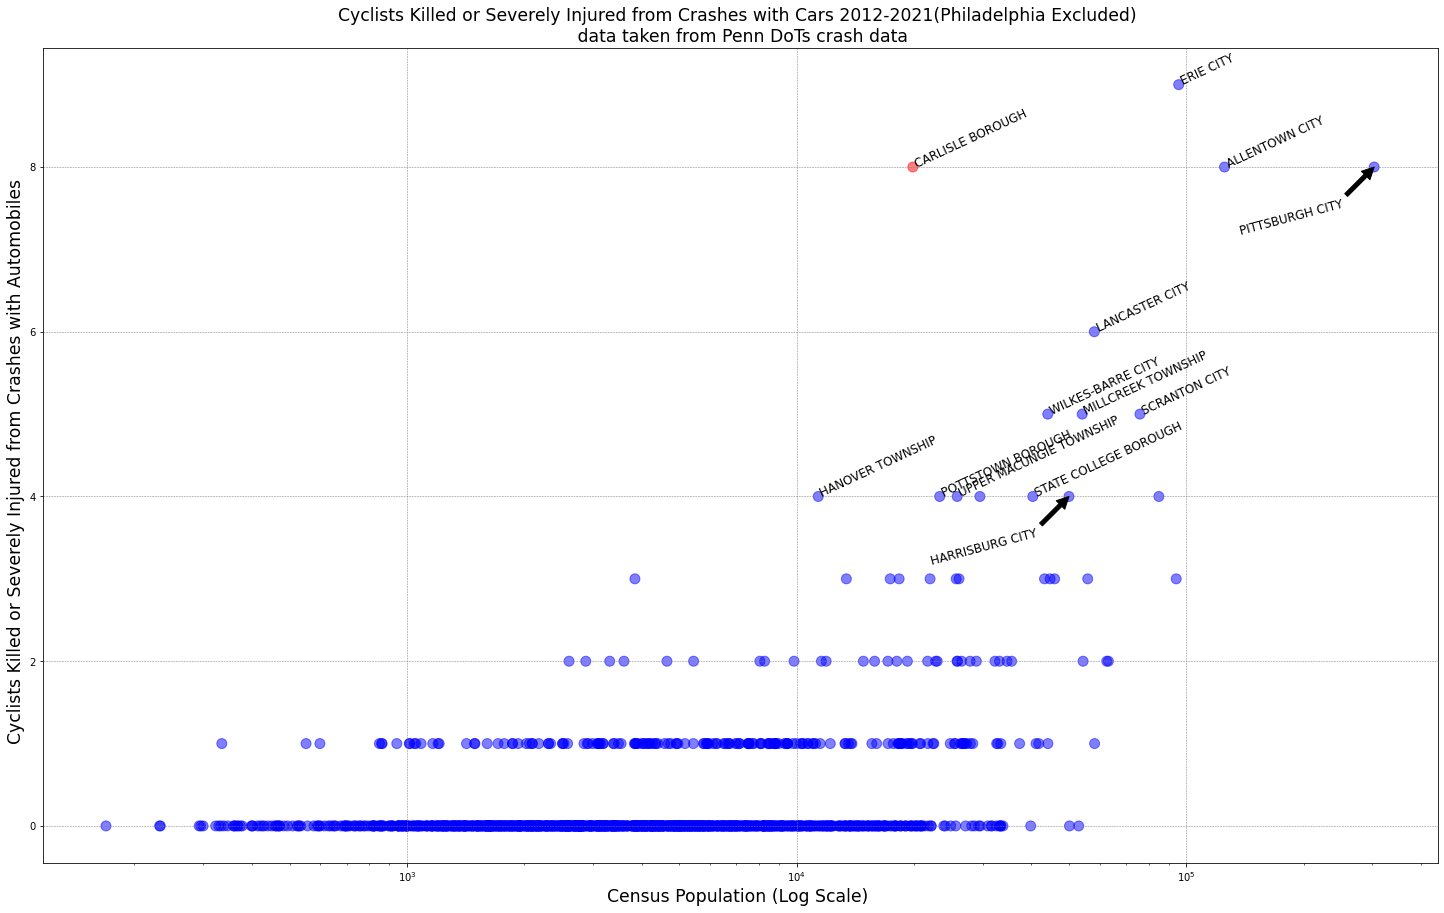

In [19]:
#make a dictionary with relevant municipalities 

MUNI_CRASH_DF.sort_values('cycling_Deaths_and_injurys_BY_AUTO', ascending=False, inplace=True)
Relivant_Muni_names = MUNI_CRASH_DF['PENN_DOT_MUNI_NAME'].iloc[1:14]
Relivant_Muni_numbs =MUNI_CRASH_DF['MUNICIPALITY'].iloc[1:14]
Relivant_Muni_dict= dict(zip(Relivant_Muni_numbs,Relivant_Muni_names))


# Set Data subset(exclude Philadelphia because of its outlier status)
DATA = MUNI_CRASH_DF[MUNI_CRASH_DF['MUNICIPALITY']!=67301]
#set varaiables 
X= DATA['POPULATION']
Y= DATA['cycling_Deaths_and_injurys_BY_AUTO']
C=DATA['color']
plt.figure(figsize=(25,15))

#create background grid and set fill to grey
plt.grid(visible=None, which='major', axis='both',color='grey', linestyle='--', linewidth=.5)

# create scatter plot
plt.scatter(X,Y,
            #y=np.log(Mun_bike_ped_crash_df['cycling_Deaths_and_injurys_BY_AUTO']),
           c=C,
           s=100,
           alpha=.5)

#generate labels for axis and title 
plt.title("Cyclists Killed or Severely Injured from Crashes with Cars {}-{}(Philadelphia Excluded) \n data taken from Penn DoTs crash data".format(START_YEAR,END_YEAR),fontsize = 'xx-large')
plt.xlabel("Census Population (Log Scale) ",fontsize = 'xx-large')
plt.ylabel("Cyclists Killed or Severely Injured from Crashes with Automobiles  ",fontsize = 'xx-large')

# set the scale for the 
plt.xscale("log")


#Label points on chart  
for key in Relivant_Muni_dict.keys():
    text= Relivant_Muni_dict[key]
    overlap_muni=[22301,36220,2301]
    if key in overlap_muni:
        plt.annotate(text,
                    xy=((MUNI_CRASH_DF['POPULATION'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    MUNI_CRASH_DF['cycling_Deaths_and_injurys_BY_AUTO'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    xycoords='data',
                    xytext=(-30, -30),
                    textcoords='offset points',
                    fontsize='large',rotation=15,
                    arrowprops=dict(facecolor='black', shrink=0.0),
                    horizontalalignment='right', verticalalignment='top')
        
    else:
        plt.annotate(Relivant_Muni_dict[key],
                     ((MUNI_CRASH_DF['POPULATION'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                     MUNI_CRASH_DF['cycling_Deaths_and_injurys_BY_AUTO'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),fontsize='large',rotation=25)




plt.show()


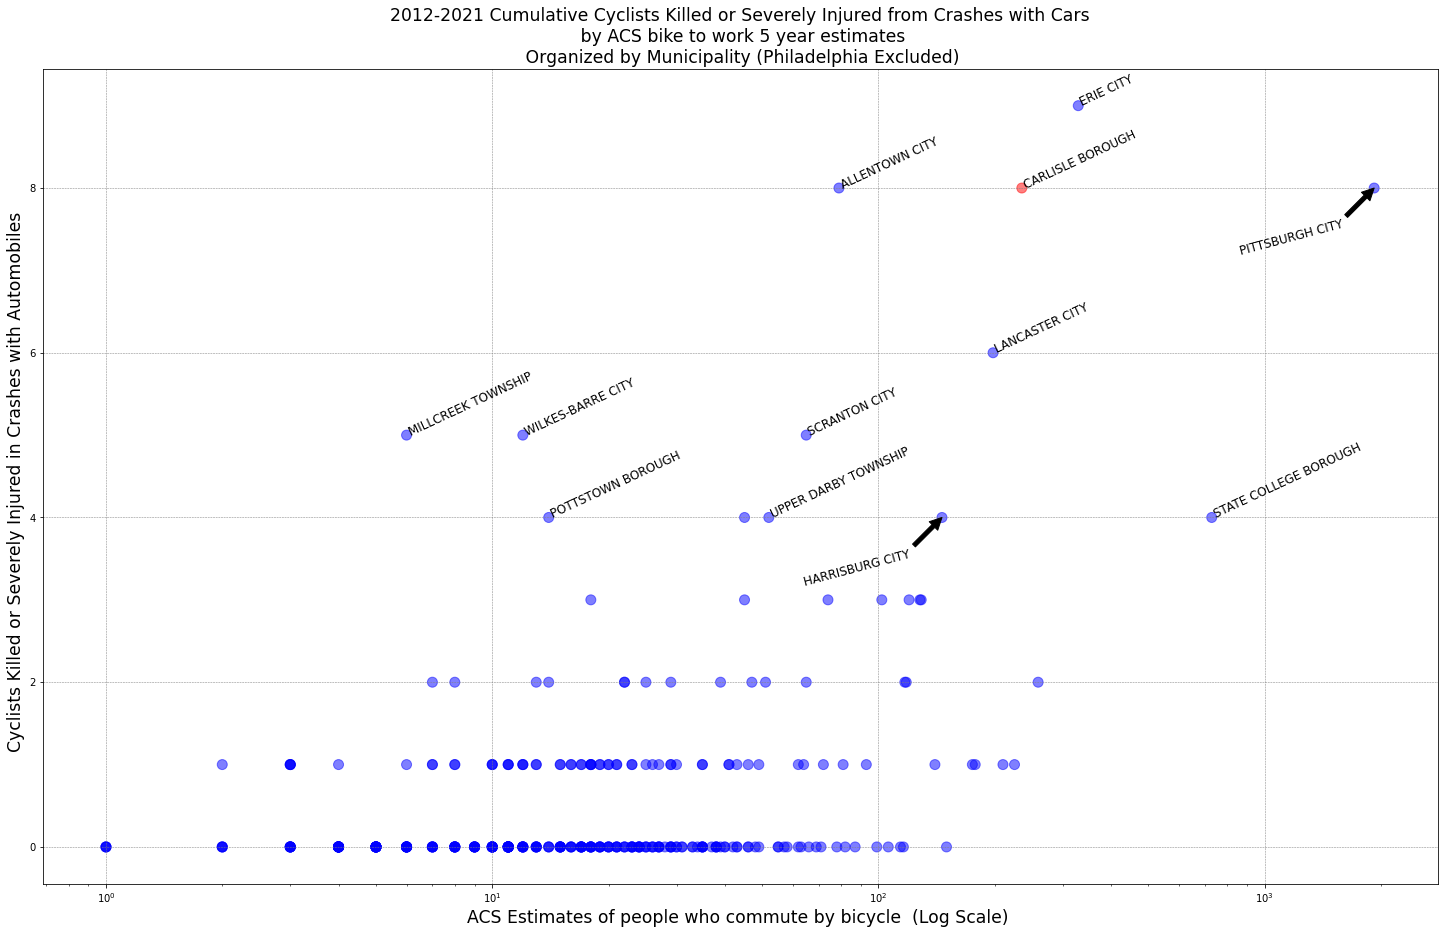

In [18]:
#make a dictionary with relevant municipalities 

MUNI_CRASH_DF.sort_values('cycling_Deaths_and_injurys_BY_AUTO', ascending=False, inplace=True)
Relivant_Muni_names = MUNI_CRASH_DF['PENN_DOT_MUNI_NAME'].iloc[1:14]
Relivant_Muni_numbs =MUNI_CRASH_DF['MUNICIPALITY'].iloc[1:14]
Relivant_Muni_dict= dict(zip(Relivant_Muni_numbs,Relivant_Muni_names))

X= (MUNI_CRASH_DF['BIKE_TO_WORK_EST'][MUNI_CRASH_DF['MUNICIPALITY']!=67301])
Y= MUNI_CRASH_DF['cycling_Deaths_and_injurys_BY_AUTO'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
C=MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
plt.figure(figsize=(25,15))

# CENSUS_POPULATION
# pop_density
plt.grid(visible=None, which='major', axis='both',color='grey', linestyle='--', linewidth=.5)

plt.scatter(X,Y,
            #y=np.log(Mun_bike_ped_crash_df['cycling_Deaths_and_injurys_BY_AUTO']),
           c=C,
           s=100,
           alpha=.5)
plt.title("{}-{} Cumulative Cyclists Killed or Severely Injured from Crashes with Cars\n by ACS bike to work 5 year estimates\n Organized by Municipality (Philadelphia Excluded)".format(START_YEAR,END_YEAR),fontsize = 'xx-large')
plt.xlabel("ACS Estimates of people who commute by bicycle  (Log Scale) ",fontsize = 'xx-large')
plt.ylabel("Cyclists Killed or Severely Injured in Crashes with Automobiles  ",fontsize = 'xx-large')

plt.xscale("log")


for key in Relivant_Muni_dict.keys():
    text= Relivant_Muni_dict[key]
    overlap_muni=[22301,36220,2301]
    if key in overlap_muni:
        plt.annotate(text,
                    xy=((MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    MUNI_CRASH_DF['cycling_Deaths_and_injurys_BY_AUTO'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    xycoords='data',
                    xytext=(-30, -30),
                    textcoords='offset points',
                    fontsize='large',rotation=15,
                    arrowprops=dict(facecolor='black', shrink=0.0),
                    horizontalalignment='right', verticalalignment='top')
        
    else:
        plt.annotate(Relivant_Muni_dict[key],
                     ((MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                     MUNI_CRASH_DF['cycling_Deaths_and_injurys_BY_AUTO'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),fontsize='large',rotation=25)




plt.show()


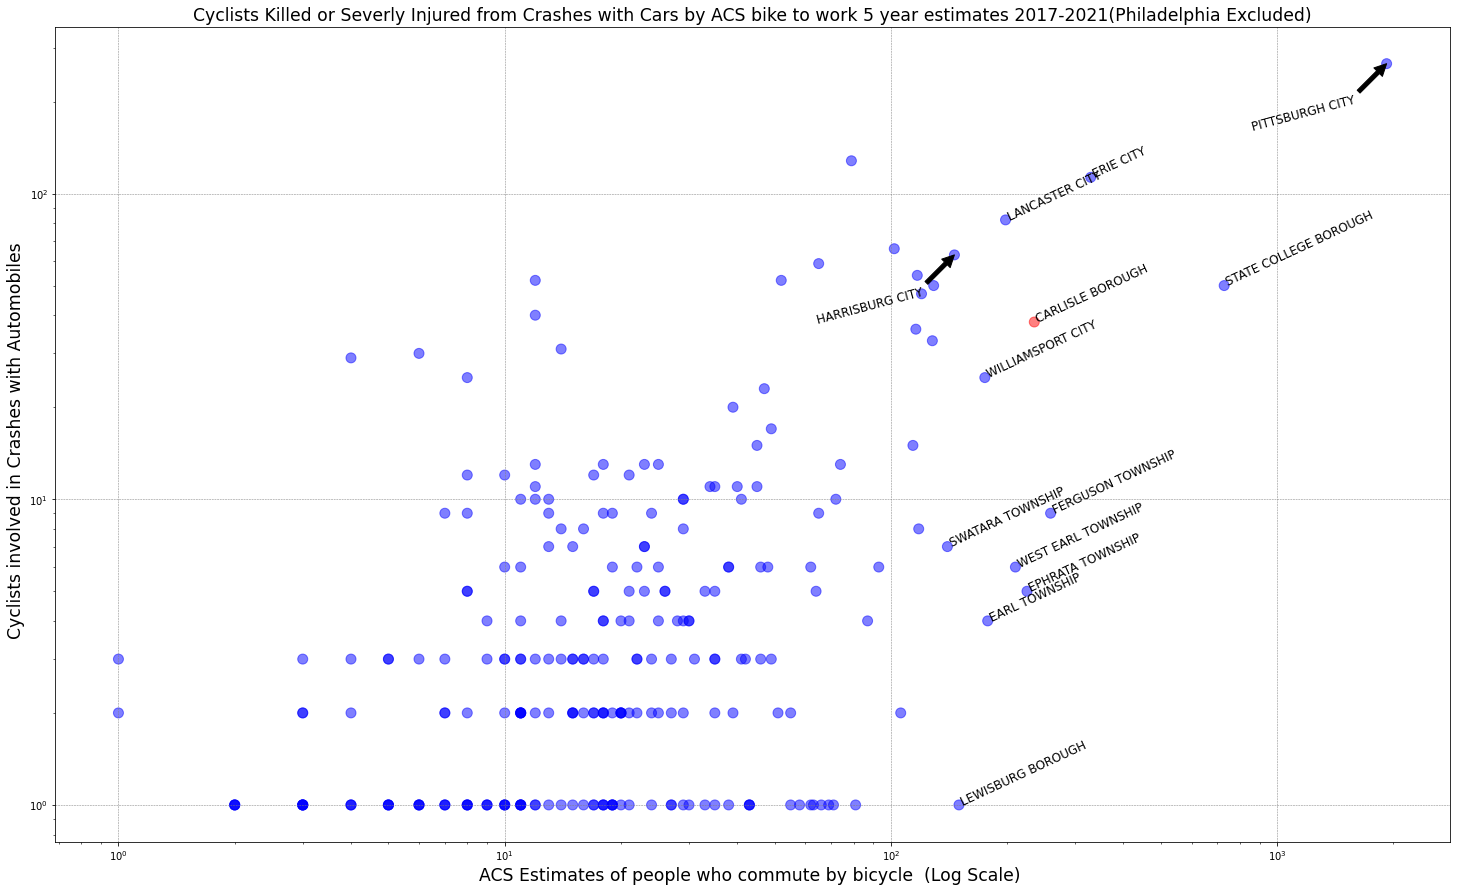

In [23]:
#make a dictionary with relevant municipalities 

MUNI_CRASH_DF.sort_values('BIKE_TO_WORK_EST', ascending=False, inplace=True)
Relivant_Muni_names = MUNI_CRASH_DF['PENN_DOT_MUNI_NAME'].iloc[1:14]
Relivant_Muni_numbs =MUNI_CRASH_DF['MUNICIPALITY'].iloc[1:14]
Relivant_Muni_dict= dict(zip(Relivant_Muni_numbs,Relivant_Muni_names))

X= (MUNI_CRASH_DF['BIKE_TO_WORK_EST'][MUNI_CRASH_DF['MUNICIPALITY']!=67301])
Y= MUNI_CRASH_DF['BICYCLE_BY_AUTO_COUNT'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
C=MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
plt.figure(figsize=(25,15))

# CENSUS_POPULATION
# pop_density
plt.grid(visible=None, which='major', axis='both',color='grey', linestyle='--', linewidth=.5)

plt.scatter(X,Y,
            #y=np.log(Mun_bike_ped_crash_df['cycling_Deaths_and_injurys_BY_AUTO']),
           c=C,
           s=100,
           alpha=.5)
plt.title("Cyclists Killed or Severly Injured from Crashes with Cars by ACS bike to work 5 year estimates 2017-2021(Philadelphia Excluded)",fontsize = 'xx-large')
plt.xlabel("ACS Estimates of people who commute by bicycle  (Log Scale) ",fontsize = 'xx-large')
plt.ylabel("Cyclists involved in Crashes with Automobiles  ",fontsize = 'xx-large')

plt.xscale("log")
plt.yscale("log")


for key in Relivant_Muni_dict.keys():
    text= Relivant_Muni_dict[key]
    overlap_muni=[22301,36220,2301]
    if key in overlap_muni:
        plt.annotate(text,
                    xy=((MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    MUNI_CRASH_DF['BICYCLE_BY_AUTO_COUNT'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    xycoords='data',
                    xytext=(-30, -30),
                    textcoords='offset points',
                    fontsize='large',rotation=15,
                    arrowprops=dict(facecolor='black', shrink=0.0),
                    horizontalalignment='right', verticalalignment='top')
        
    else:
        plt.annotate(Relivant_Muni_dict[key],
                     ((MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                     MUNI_CRASH_DF['BICYCLE_BY_AUTO_COUNT'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),fontsize='large',rotation=25)




plt.show()


In [87]:
MUNI_CRASH_DF[['NAME','PENN_DOT_MUNI_ID']][MUNI_CRASH_DF['MUNICIPALITY']=='LEWISBURG BOROUGH'].head()

,NAME,PENN_DOT_MUNI_ID


/tmp/ipykernel_50877/2849338011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']==21402]='orange'


{2301.0: 'PITTSBURGH CITY', 14410.0: 'STATE COLLEGE BOROUGH', 25302.0: 'ERIE CITY', 14206.0: 'FERGUSON TOWNSHIP', 21402.0: 'CARLISLE BOROUGH', 36218.0: 'EPHRATA TOWNSHIP', 36238.0: 'WEST EARL TOWNSHIP', 36301.0: 'LANCASTER CITY', 36209.0: 'EARL TOWNSHIP', 41301.0: 'WILLIAMSPORT CITY', 59402.0: 'LEWISBURG BOROUGH', 22301.0: 'HARRISBURG CITY', 22102.0: 'SWATARA TOWNSHIP'}


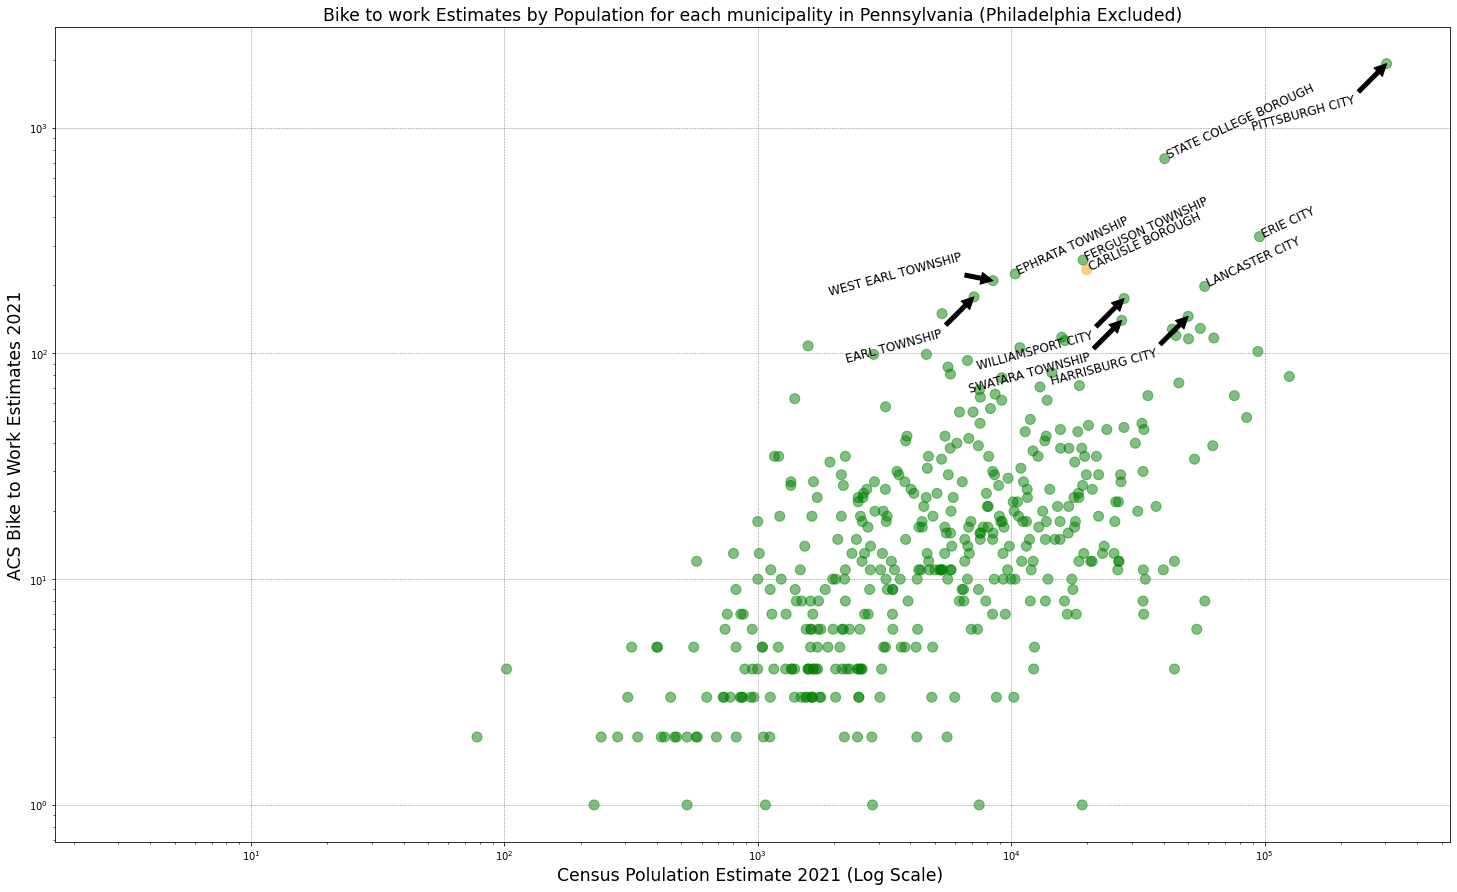

In [100]:
#make a dictionary with relevant municipalities 

MUNI_CRASH_DF['color']='g'
MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']==21402]='orange'


MUNI_CRASH_DF.sort_values('BIKE_TO_WORK_EST', ascending=False, inplace=True)
Relivant_Muni_names = MUNI_CRASH_DF['PENN_DOT_MUNI_NAME'].iloc[1:14]
Relivant_Muni_numbs =MUNI_CRASH_DF['MUNICIPALITY'].iloc[1:14]
Relivant_Muni_dict= dict(zip(Relivant_Muni_numbs,Relivant_Muni_names))

print(Relivant_Muni_dict)
X= (MUNI_CRASH_DF['POPULATION'][MUNI_CRASH_DF['MUNICIPALITY']!=67301])
Y= MUNI_CRASH_DF['BIKE_TO_WORK_EST'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
C=MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
plt.figure(figsize=(25,15))

# CENSUS_POPULATION
# pop_density
plt.grid(visible=None, which='major', axis='both',color='grey', linestyle='--', linewidth=.5)

plt.scatter(X,Y,
            #y=np.log(Mun_bike_ped_crash_df['cycling_Deaths_and_injurys_BY_AUTO']),
           c=C,
           s=100,
           alpha=.5)
plt.title("{} Five Year Bike to work Estimates by Population for each municipality in Pennsylvania (Philadelphia Excluded)".format(END_YEAR),fontsize = 'xx-large')
plt.xlabel("Census Polulation Estimate 2021 (Log Scale) ",fontsize = 'xx-large')
plt.ylabel("ACS Bike to Work Estimates 2021",fontsize = 'xx-large')

plt.xscale("log")
plt.yscale("log")


for key in Relivant_Muni_dict.keys():
    text= Relivant_Muni_dict[key]
    up_overlap_muni=[22301,36220,2301,41301,36209,22102]
    down_overlap_muni=[36238,22102]
    delete_label = [59402]

    if key in up_overlap_muni:
        plt.annotate(text,
                    xy=((MUNI_CRASH_DF['POPULATION'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    xycoords='data',
                    xytext=(-30, -30),
                    textcoords='offset points',
                    fontsize='large',rotation=15,
                    arrowprops=dict(facecolor='black', shrink=0.0),
                    horizontalalignment='right', verticalalignment='top')
        
    elif key in down_overlap_muni:
        plt.annotate(text,
                    xy=((MUNI_CRASH_DF['POPULATION'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    xycoords='data',
                    xytext=(-30, 30),
                    textcoords='offset points',
                    fontsize='large',rotation=15,
                    arrowprops=dict(facecolor='black', shrink=0.0),
                    horizontalalignment='right', verticalalignment='top')
    
    elif key in delete_label:
        None
    
    else:
        plt.annotate(Relivant_Muni_dict[key],
                     ((MUNI_CRASH_DF['POPULATION'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                     MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),fontsize='large',rotation=25)




plt.show()


In [46]:
MUNI_CRASH_DF.head()

,Unnamed: 0,NAME,PENN_DOT_MUNI_ID,state,county,county_subdivision,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,WALK_TO_WORK_MARG,DRIVE_SOLO_TO_WORK_EST,DRIVE_SOLO_TO_WORK_MARG,CARPOOL_TO_WORK_EST,CARPOOL_TO_WORK_MARG,PUBTRANS_TO_WORK_EST,PUBTRANS_TO_WORK_MARG,MUNI_NAME,COUNTY_NAME,PENN_DOT_COUNTY_NUM,PENN_DOT_COUNTY_NAME,PENN_DOT_MUNI_NAME,MUNICIPALITY_NAME,LAND_AREA.1,FEDERAL_EIN_CODE,HOME_RULE_CODE,HOME_RULE_NAME,HOME_RULE_YEAR,GOVERNMENTAL_FORM,EMPLOYEES_FULL_TIME,EMPLOYEES_PART_TIME,INCORPORATION_YEAR,MUNICIPALITY,AUTOMOBILE_COUNT,BICYCLE_BY_AUTO_COUNT,BICYCLE_DEATH_BY_AUTO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,PED_BY_AUTO_COUNT,PED_DEATH_BY_AUTO_COUNT,PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,BICYCLE_SOLO_COUNT,BICYCLE_DEATH_SOLO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT,PED_SOLO_COUNT,PED_DEATH_SOLO_COUNT,PED_SUSP_SERIOUS_INJ_SOLO_COUNT,cycling_Deaths_and_injurys_BY_AUTO,color
0,0,"Philadelphia city, Philadelphia County","67,301.000000",42.000000,101.000000,"60,000.000000","1,596,865.000000",134.100000,"14,172.000000",940.000000,"54,269.000000","2,031.000000","343,702.000000","5,207.000000","55,482.000000","3,121.000000","152,058.000000","4,179.000000",PHILADELPHIA CITY,PHILADELPHIA COUNTY,67.000000,PHILADELPHIA COUNTY,PHILADELPHIA CITY,PHILADELPHIA CITY,134.100000,"236,003,047.000000",Home Rule,PHILADELPHIA CITY,"1,952.000000",NaN,"22,325.000000","1,037.000000",NaN,"67,301.000000","11,043.000000","2,423.000000",15.000000,71.000000,"8,712.000000",201.000000,478.000000,"1,726.000000",23.000000,61.000000,"6,977.000000",179.000000,417.000000,86.000000,b
1,1,"Pittsburgh city, Allegheny County","2,301.000000",42.000000,3.000000,"61,000.000000","303,207.000000",55.400000,"1,920.000000",290.000000,"15,005.000000","1,033.000000","80,593.000000","2,054.000000","10,191.000000",814.000000,"23,357.000000","1,252.000000",PITTSBURGH CITY,ALLEGHENY COUNTY,2.000000,ALLEGHENY COUNTY,PITTSBURGH CITY,PITTSBURGH CITY,55.400000,"256,000,879.000000",Home Rule,CITY OF PITTSBURGH,"1,976.000000",NaN,"3,098.000000",149.000000,"1,816.000000","2,301.000000","1,810.000000",304.000000,4.000000,5.000000,"1,498.000000",16.000000,153.000000,197.000000,3.000000,16.000000,965.000000,34.000000,87.000000,9.000000,b
30,30,"Allentown city, Lehigh County","39,301.000000",42.000000,77.000000,"2,000.000000","125,250.000000",17.600000,79.000000,51.000000,"2,396.000000",607.000000,"36,549.000000","1,464.000000","8,407.000000",817.000000,"2,039.000000",396.000000,ALLENTOWN CITY,LEHIGH COUNTY,39.000000,LEHIGH COUNTY,ALLENTOWN CITY,ALLENTOWN CITY,17.600000,"236,003,116.000000",Home Rule,CITY OF ALLENTOWN,"1,997.000000",Mayor/Council,793.000000,18.000000,"1,867.000000","39,301.000000",947.000000,140.000000,1.000000,7.000000,791.000000,7.000000,66.000000,79.000000,1.000000,1.000000,415.000000,5.000000,42.000000,8.000000,b
3,3,"Erie city, Erie County","25,302.000000",42.000000,49.000000,"24,000.000000","95,536.000000",19.100000,329.000000,191.000000,"2,003.000000",392.000000,"28,933.000000","1,152.000000","5,476.000000",668.000000,"1,482.000000",312.000000,ERIE CITY,ERIE COUNTY,25.000000,ERIE COUNTY,ERIE CITY,ERIE CITY,19.100000,"256,000,857.000000",Opional 3rd Class City Charter,CITY OF ERIE,"1,962.000000",Mayor/Council,659.000000,78.000000,"1,851.000000","25,302.000000",432.000000,137.000000,1.000000,10.000000,298.000000,8.000000,32.000000,130.000000,1.000000,4.000000,268.000000,8.000000,31.000000,11.000000,b
8,8,"Lancaster city, Lancaster County","36,301.000000",42.000000,71.000000,"41,216.000000","58,034.000000",7.200000,198.000000,114.000000,"3,107.000000",512.000000,"18,046.000000",940.000000,"3,726.000000",509.000000,"1,288.000000",368.000000,LANCASTER CITY,LANCASTER COUNTY,36.000000,LANCASTER COUNTY,LANCASTER CITY,LANCASTER CITY,7.200000,"236,001,904.000000",Opional 3rd Class City Charter,CITY OF LANCASTER,"1,966.000000",NaN,548.000000,17.000000,"1,818.000000","36,301.000000",494.000000,93.000000,0.000000,7.000000,395.000000,2.000000,

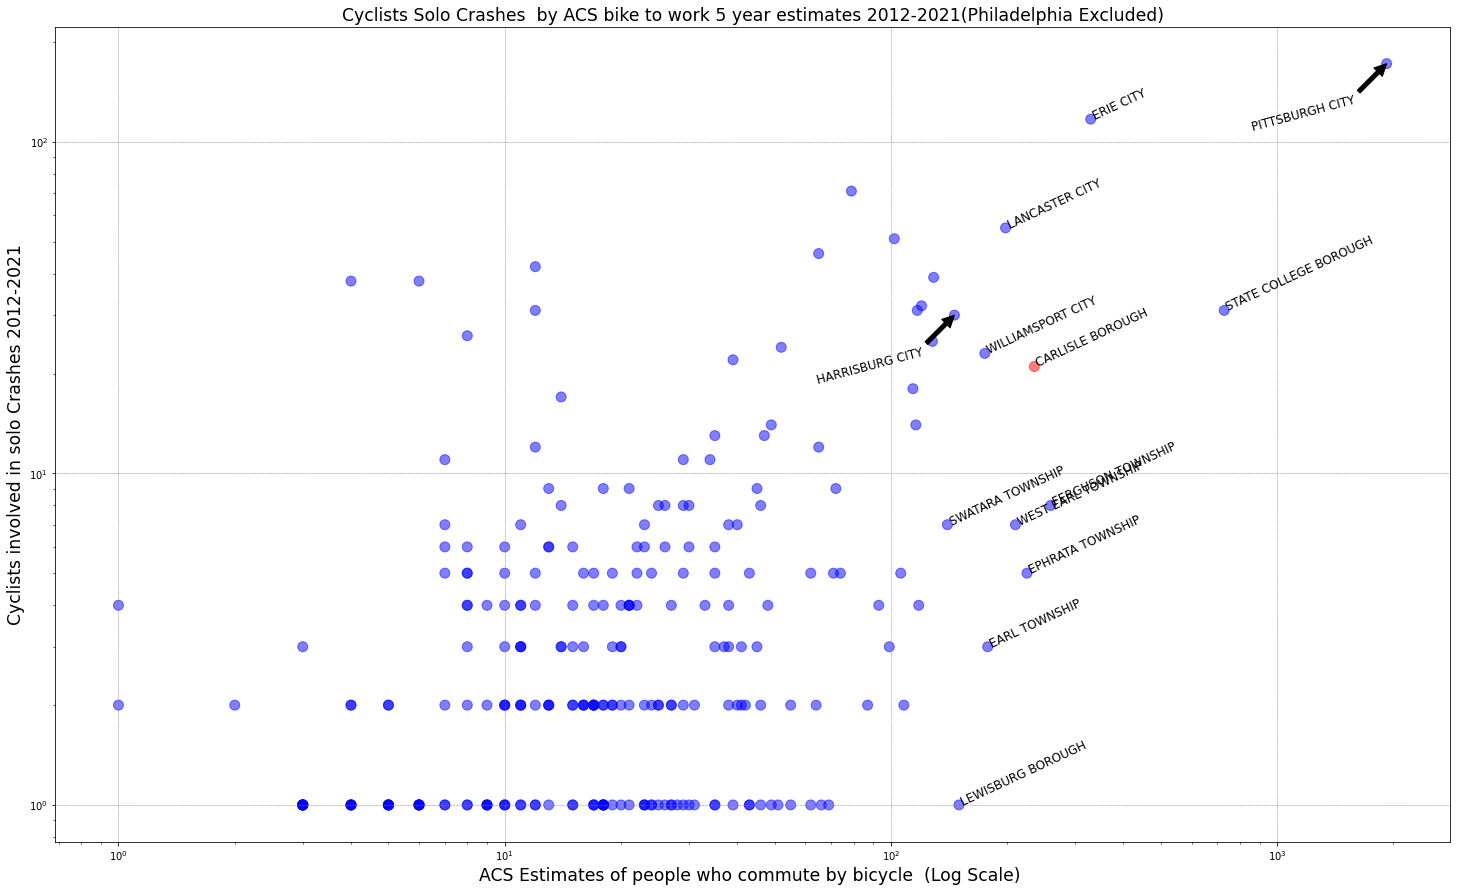

In [22]:
#make a dictionary with relevant municipalities 

MUNI_CRASH_DF.sort_values('BIKE_TO_WORK_EST', ascending=False, inplace=True)
Relivant_Muni_names = MUNI_CRASH_DF['PENN_DOT_MUNI_NAME'].iloc[1:14]
Relivant_Muni_numbs =MUNI_CRASH_DF['MUNICIPALITY'].iloc[1:14]
Relivant_Muni_dict= dict(zip(Relivant_Muni_numbs,Relivant_Muni_names))

X= (MUNI_CRASH_DF['BIKE_TO_WORK_EST'][MUNI_CRASH_DF['MUNICIPALITY']!=67301])
Y= MUNI_CRASH_DF['BICYCLE_SOLO_COUNT'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
C=MUNI_CRASH_DF['color'][MUNI_CRASH_DF['MUNICIPALITY']!=67301]
plt.figure(figsize=(25,15))

# CENSUS_POPULATION
# pop_density
plt.grid(visible=None, which='major', axis='both',color='grey', linestyle='--', linewidth=.5)

plt.scatter(X,Y,
            #y=np.log(Mun_bike_ped_crash_df['cycling_Deaths_and_injurys_BY_AUTO']),
           c=C,
           s=100,
           alpha=.5)
plt.title("Cyclists Solo Crashes  by ACS bike to work 5 year estimates {}-{}(Philadelphia Excluded)".format(START_YEAR,END_YEAR),fontsize = 'xx-large')
plt.xlabel("ACS Estimates of people who commute by bicycle  (Log Scale) ",fontsize = 'xx-large')
plt.ylabel("Cyclists involved in solo Crashes {}-{}".format(START_YEAR,END_YEAR),fontsize = 'xx-large')

plt.xscale("log")
plt.yscale("log")


for key in Relivant_Muni_dict.keys():
    text= Relivant_Muni_dict[key]
    overlap_muni=[22301,36220,2301]
    if key in overlap_muni:
        plt.annotate(text,
                    xy=((MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    MUNI_CRASH_DF['BICYCLE_SOLO_COUNT'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                    xycoords='data',
                    xytext=(-30, -30),
                    textcoords='offset points',
                    fontsize='large',rotation=15,
                    arrowprops=dict(facecolor='black', shrink=0.0),
                    horizontalalignment='right', verticalalignment='top')
        
    else:
        plt.annotate(Relivant_Muni_dict[key],
                     ((MUNI_CRASH_DF['BIKE_TO_WORK_EST'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),
                     MUNI_CRASH_DF['BICYCLE_SOLO_COUNT'][(MUNI_CRASH_DF['MUNICIPALITY']== key)]),fontsize='large',rotation=25)




plt.show()
